In [ ]:
# This chunk of code is where the getMeanTable command was designed to get the mean for each nucleotide position.
# The results were then saved as individual files and then converted into graphs below. 

import numpy as np
import matplotlib.pyplot as plt
import argparse

def get_arguments():
	'''Takes a FASTQ file and reports the mean for each quality score for each position. File is required,
    and an output name is required.'''
	parser = argparse.ArgumentParser(description = "Stats for each quality score position")
	parser.add_argument("-f", "--filename", help= "Designates the FASTQ file",\
		required=True,type=str)
	parser.add_argument("-o", "--output", help= "Designates the output TSV name",\
		required=True,type=str)
	return parser.parse_args()

args = get_arguments()

file = filename.args
outputFile = output.args

scores = np.zeros(101, dtype=float)

def convert_Phred(char):
    '''Converts a character to a Phred score.'''
    return ord(char) - 33

def totalScores(file, scores):
    '''Adds up all scores based on basepair position.'''
    with open(file, "r") as fh:
        LN = 0
        for line in fh:
            LN += 1
            if LN % 4 == 0:
                line = line.strip("\n")
                for char in range(len(line)):
                    scores[char] += convert_Phred(line[char])
                if LN % 100000 == 0:
                    print(LN)
        return scores, LN

def getMean(scores, LN):
    '''Calculates the mean for each position.'''
    reads = LN / 4
    for value in range(len(scores)):
        scores[value] = scores[value] / reads
    return scores

def printStats(scores):
    '''Prints the TSV table with mean for each position in the file.'''
    with open(outputFile, "w") as fh:
        fh.write("#_Base_Pairs\tMean_Quality_Score\n")
        for position in range(len(scores)):
            resultString1 = str(position) + "\t" + str(scores[position]) + "\n"
            fh.write(resultString1)

scores, LN = totalScores(file, scores)
mean_scores = getMean(scores, LN)
printStats(mean_scores)


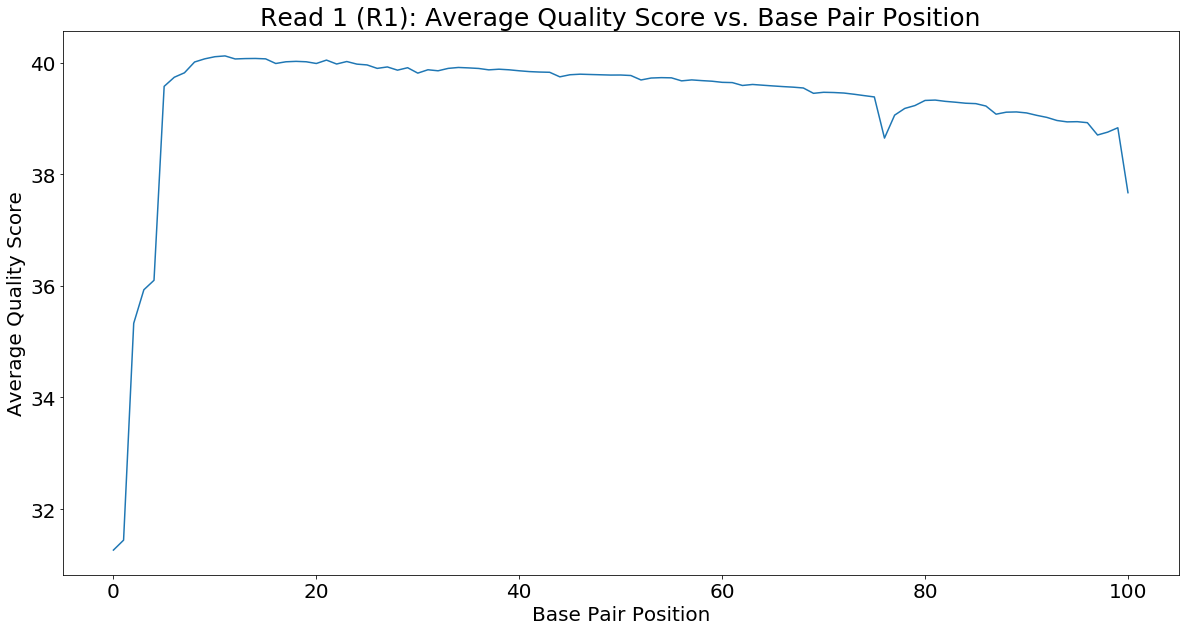

In [3]:
import matplotlib.pyplot as plt

inputFile = "R1Stats.tsv"
averages = []


with open(inputFile, "r") as fh:
    ln = 0 
    for line in fh:
        ln += 1
        if ln != 1:
            line = line.strip("\n").split()
            average = float(line[1])
            averages.append(average)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(range(len(averages)), averages)
plt.title("Read 1 (R1): Average Quality Score vs. Base Pair Position", fontsize=25)
plt.xlabel('Base Pair Position', fontsize=20)
plt.ylabel('Average Quality Score', fontsize=20)
plt.savefig("Read1_R1_averages_graph.jpeg")
plt.show()

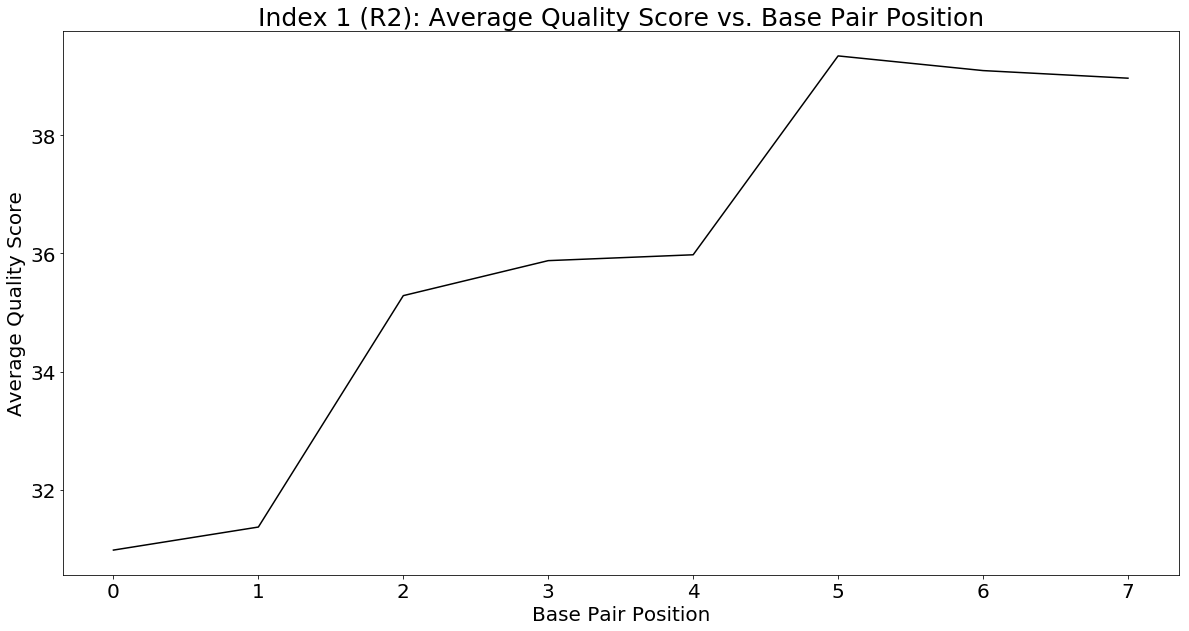

In [4]:
import matplotlib.pyplot as plt

inputFile = "R2Stats.tsv"
averages = []


with open(inputFile, "r") as fh:
    ln = 0 
    for line in fh:
        ln += 1
        if ln != 1 and ln <= 9:
            line = line.strip("\n").split()
            average = float(line[1])
            averages.append(average)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(range(len(averages)), averages, "-k")
plt.title("Index 1 (R2): Average Quality Score vs. Base Pair Position", fontsize=25)
plt.xlabel('Base Pair Position', fontsize=20)
plt.ylabel('Average Quality Score', fontsize=20)
plt.savefig("Index1_R2_averages_graph.jpeg")
plt.show()

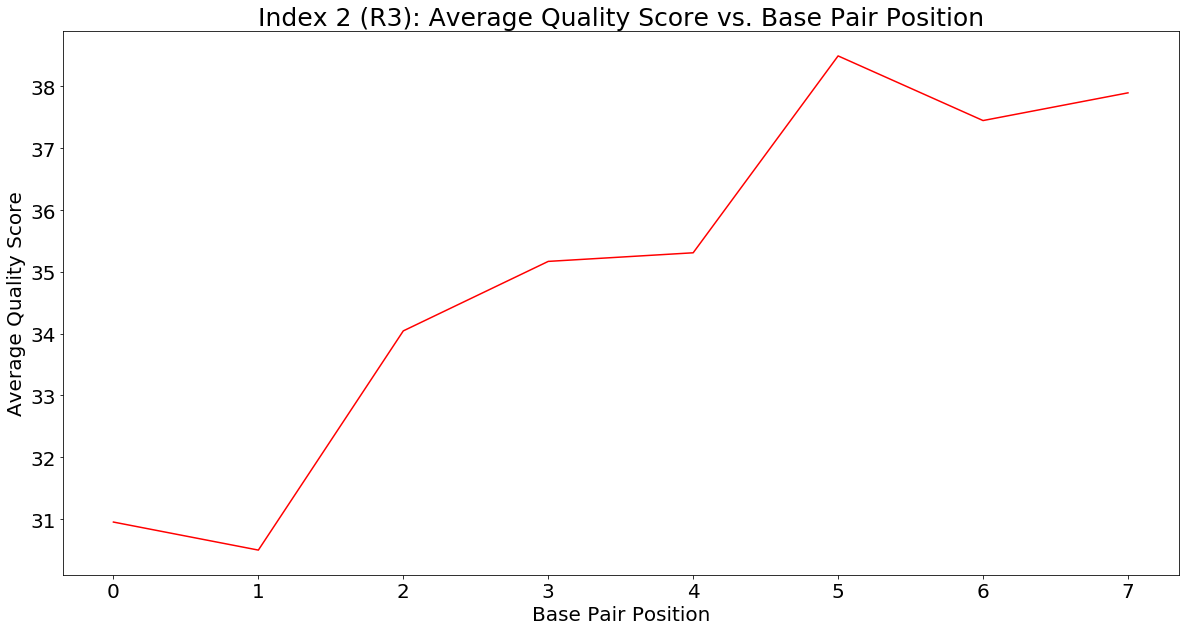

In [5]:
import matplotlib.pyplot as plt

inputFile = "R3Stats.tsv"
averages = []


with open(inputFile, "r") as fh:
    ln = 0 
    for line in fh:
        ln += 1
        if ln != 1 and ln <= 9:
            line = line.strip("\n").split()
            average = float(line[1])
            averages.append(average)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(range(len(averages)), averages, "-r")
plt.title("Index 2 (R3): Average Quality Score vs. Base Pair Position", fontsize=25)
plt.xlabel('Base Pair Position', fontsize=20)
plt.ylabel('Average Quality Score', fontsize=20)
plt.savefig("Index2_R3_averages_graph.jpeg")
plt.show()

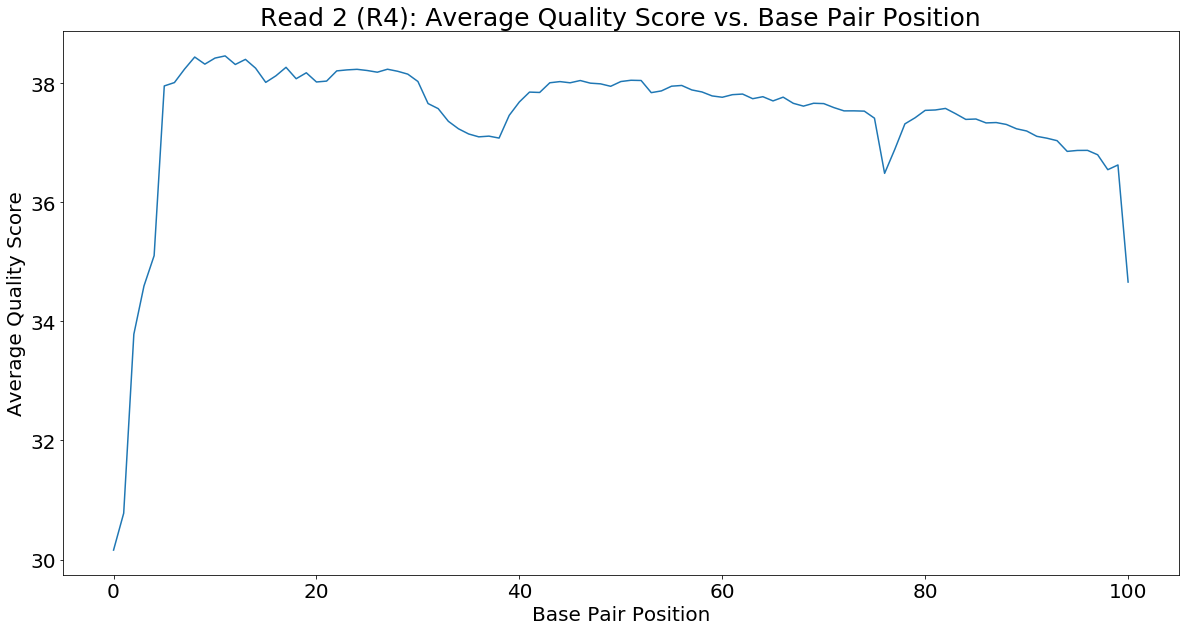

In [6]:
import matplotlib.pyplot as plt

inputFile = "R4Stats.tsv"
averages = []


with open(inputFile, "r") as fh:
    ln = 0 
    for line in fh:
        ln += 1
        if ln != 1:
            line = line.strip("\n").split()
            average = float(line[1])
            averages.append(average)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(range(len(averages)), averages)
plt.title("Read 2 (R4): Average Quality Score vs. Base Pair Position", fontsize=25)
plt.xlabel('Base Pair Position', fontsize=20)
plt.ylabel('Average Quality Score', fontsize=20)
plt.savefig("Read2_R4_averages_graph.jpeg")
plt.show()